## 2d Gaussian pdf for each defect

In [295]:
import numpy as np
from scipy.stats import multivariate_normal

In [300]:
xymax = 5.
nbins = 51
linx = np.linspace(-xymax, xymax, nbins)
x,y = np.meshgrid(linx,linx)


In [301]:
stack = np.dstack([x,y])

In [302]:
z = multivariate_normal.pdf(stack, mean=[0,0], cov=[[1,0],[0,1]])

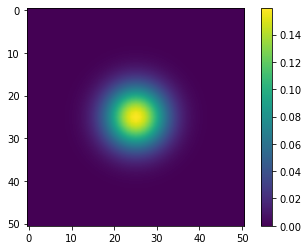

In [303]:
plot = plt.imshow(z, interpolation='bilinear')
plt.colorbar(plot)

## Stack multiple defects

In [330]:
n_centers = 20
amplitudes = np.random.random(n_centers) 
mins, maxs = 0.005, 0.1
sigmas =  np.random.random(n_centers) * (maxs-mins) + mins
print(amplitudes)
print(sigmas)

[0.83742293 0.1642641  0.65953555 0.20944021 0.38062231 0.08741468
 0.04853349 0.60343315 0.85387236 0.02709933 0.39156401 0.62401461
 0.7937637  0.47176984 0.45350147 0.46151389 0.7043254  0.55099484
 0.00115926 0.32379698]
[0.00815375 0.06728818 0.00553924 0.02043162 0.02027196 0.06858239
 0.07541901 0.09506196 0.01734876 0.01474696 0.0375835  0.05390473
 0.05996599 0.09675063 0.07430558 0.05061646 0.06679234 0.08406553
 0.09951996 0.00958506]


In [331]:
centers = (np.random.rand(n_centers, 2) - 0.5 ) * 2 * xymax
centers

array([[ 4.37618058,  4.07719598],
       [-3.98722063,  3.19979871],
       [ 1.24545776,  3.71870047],
       [-4.50574874, -2.74518943],
       [ 2.4788057 , -4.90523481],
       [ 1.06957181,  3.67950594],
       [-0.6101305 , -0.45388742],
       [-1.31851777,  2.19251278],
       [-1.47551582,  4.89781466],
       [ 0.99090734,  3.04954151],
       [ 4.16460601, -2.77150435],
       [-2.37187165, -0.80048925],
       [-4.68696437, -0.60475778],
       [ 3.84089418,  0.21573375],
       [-1.0951695 , -4.3692004 ],
       [-4.35620419, -0.38691102],
       [-1.73625702, -2.16029882],
       [-3.58350694, -3.19560114],
       [-1.66446443,  4.98162382],
       [ 4.45289629,  4.88381876]])

In [332]:
defects = []
for center, sigma, amplitude in zip(centers, sigmas, amplitudes): 
    defects.append( multivariate_normal.pdf(stack, mean=center, cov=[[sigma,0],[0,sigma]]) * amplitude )


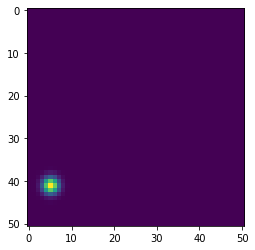

In [333]:
plt.imshow(defects[1])

In [334]:
all_defects = np.c_[defects]
all_defects.shape

(20, 51, 51)

In [335]:
image = np.sum(all_defects, axis=0)

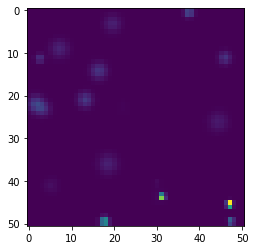

In [336]:
plt.imshow(image)

## Blob detection

In [340]:
from skimage.feature import blob_log
blobs_log = blob_log(image, max_sigma=3, min_sigma=1, num_sigma=20, threshold=0.05)

In [341]:
import math
blobs_log[:, 2] = blobs_log[:, 2] * math.sqrt(2)
blobs_log

array([[50.        , 47.        ,  1.41421356],
       [50.        , 18.        ,  1.71194273],
       [45.        , 47.        ,  1.41421356],
       [44.        , 31.        ,  1.41421356],
       [41.        ,  5.        ,  1.86080732],
       [40.        , 30.        ,  1.41421356],
       [36.        , 18.        ,  2.15853649],
       [26.        , 44.        ,  2.15853649],
       [23.        , 22.        ,  2.0096719 ],
       [22.        ,  2.        ,  1.86080732],
       [21.        , 13.        ,  1.71194273],
       [14.        , 16.        ,  1.86080732],
       [11.        , 46.        ,  1.41421356],
       [11.        ,  2.        ,  1.41421356],
       [ 9.        ,  7.        ,  2.0096719 ],
       [ 3.        , 20.        ,  2.0096719 ],
       [ 0.        , 37.        ,  1.71194273]])

Beware, below we plot in log scale (1 sigma circles)

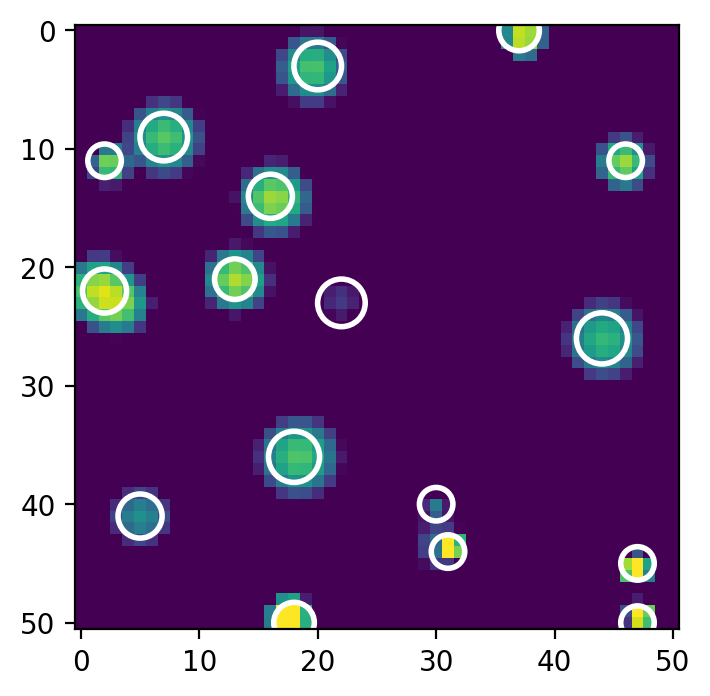

In [348]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(1, dpi=200)
plt.imshow(image, 
           norm=LogNorm(vmin=0.05, vmax=3)
          )
ax.set_aspect('equal')
for blob in blobs_log: 
    y, x, r = blob 
    circle = plt.Circle((x, y), r, color='white', linewidth=2, fill=False)
    ax.add_patch(circle)